In [1]:
import os
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

Category: daisy


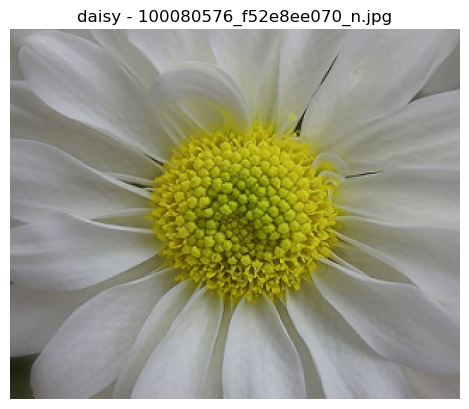

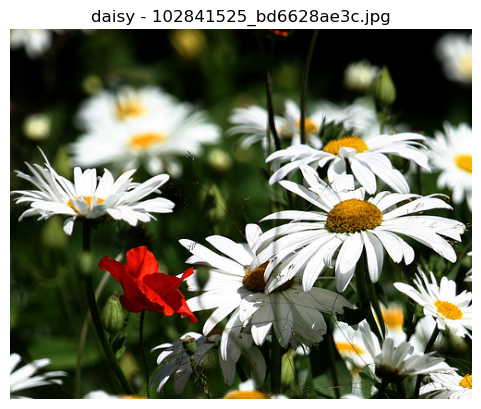

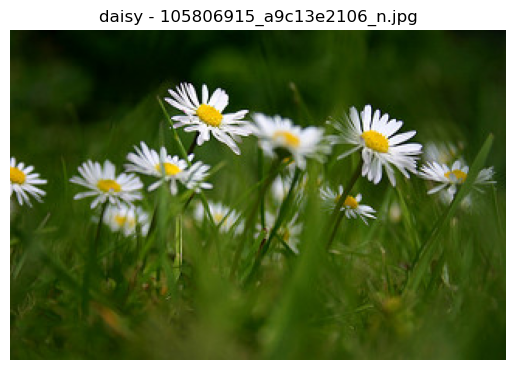

Category: dandelion


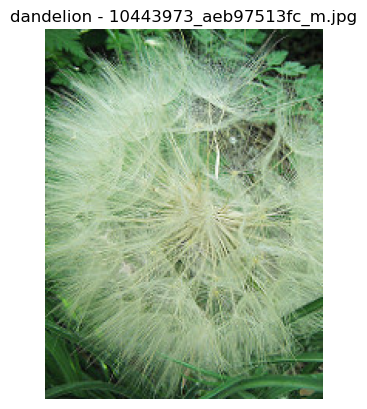

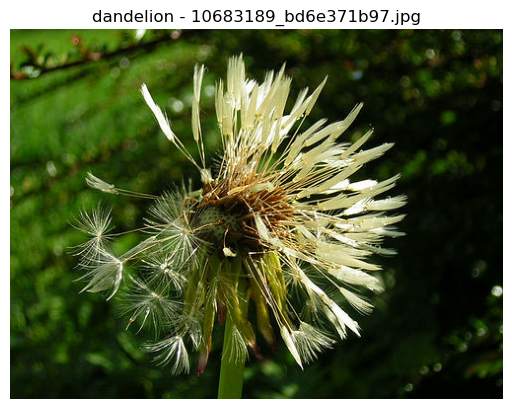

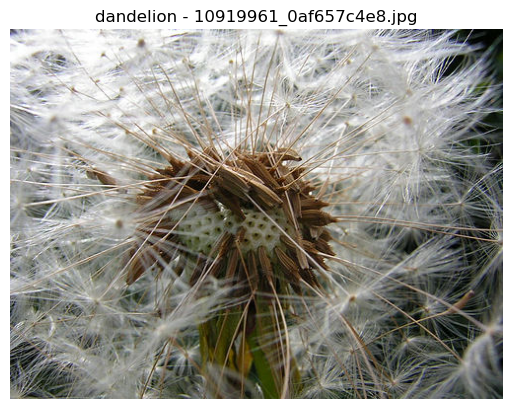

Category: roses


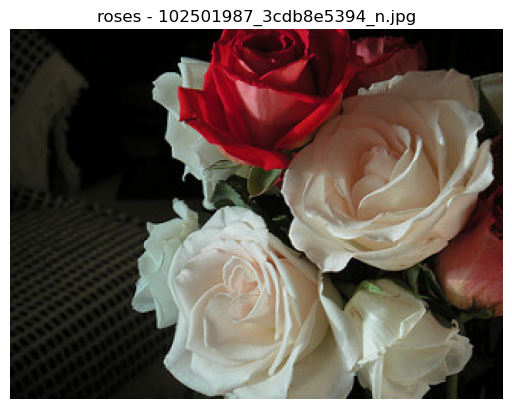

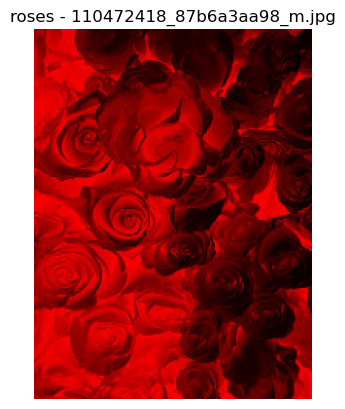

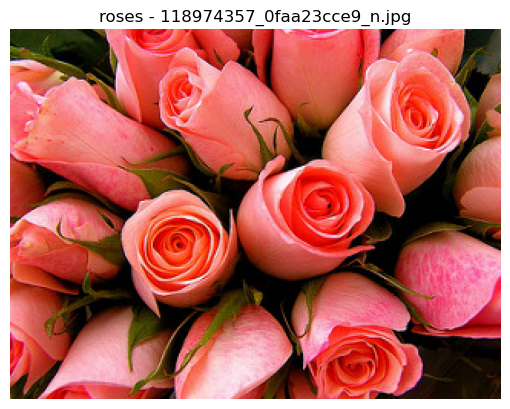

Category: sunflowers


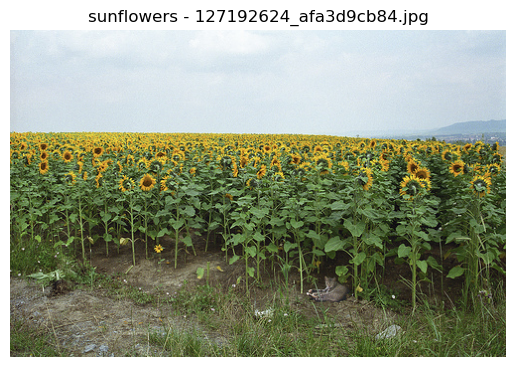

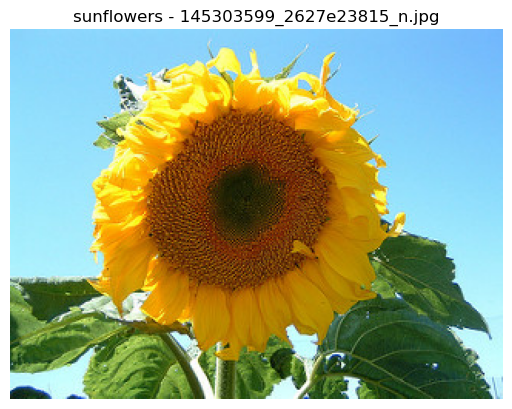

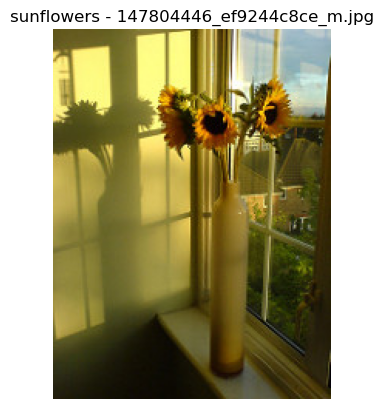

Category: tulips


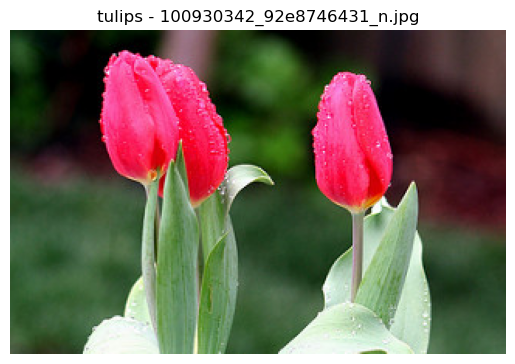

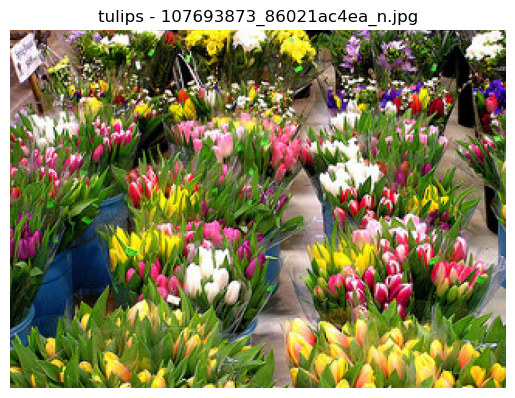

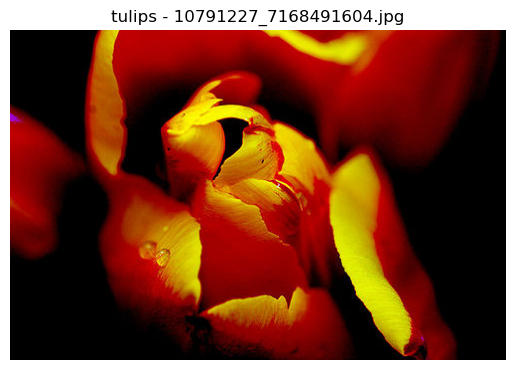

In [2]:
dataset_dir = 'dataset/flower_photos/'

categories = os.listdir(dataset_dir)

# Display images from each category
num_images_per_category = 3
for category in categories:
    category_dir = os.path.join(dataset_dir, category)
    if os.path.isdir(category_dir):
        print(f"Category: {category}")
        image_files = [f for f in os.listdir(category_dir) if f.endswith('.jpg')]
        for i in range(num_images_per_category):
            img_path = os.path.join(category_dir, image_files[i])
            img = Image.open(img_path)
            plt.imshow(img)
            plt.title(f"{category} - {image_files[i]}")
            plt.axis('off')
            plt.show()

In [3]:
X = []
y = []
for category in categories:
    category_dir = os.path.join(dataset_dir, category)
    if os.path.isdir(category_dir):
        image_files = [f for f in os.listdir(category_dir) if f.endswith('.jpg')]
        for img_file in image_files:
            img_path = os.path.join(category_dir, img_file)
            img = Image.open(img_path).resize((128, 128))  # Resize images to a consistent size
            img_array = np.array(img).flatten()  # Convert image to a 1D array
            X.append(img_array)
            y.append(1 if category == 'daisy' else 0)

# Convert lists to numpy arrays
X = np.array(X)
y = np.array(y)

In [4]:
X.shape

(120, 49152)

In [5]:
y


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [6]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# def get_score(model,X_train, X_test, y_train, y_test):
#     model.fit(X_train,y_train)
#     return model.score(X_test,y_test)

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import StratifiedKFold
folds = StratifiedKFold(n_splits=4,random_state=101, shuffle=True)

In [9]:
#folds.get_n_splits(X,y)

In [10]:
#folds.split(X,y)

In [11]:
#Tried using direct module(cross_val_score) to find the accuracy of RandomForest module 
# from sklearn.model_selection import cross_val_score
# scores1 = cross_val_score(RandomForestClassifier(n_estimators=5),X, y, cv=10)
# np.average(scores1)

In [12]:
# scores1

In [13]:
from sklearn.metrics import accuracy_score
accuracy=[]
model_11 = LogisticRegression() 

for train_index, test_index in folds.split(X,y):
    print("Train", train_index, "Validation", test_index)
    X1_train,X1_test=X[train_index],X[test_index]
    y1_train,y1_test=y[train_index],y[test_index]
    
                       
    model_11.fit(X1_train, y1_train)
    prediction=model_11.predict(X1_test)
    score=accuracy_score(prediction,y1_test)
    accuracy.append(score)
                            
print(accuracy)
   

Train [  0   1   2   3   4   5   9  10  12  14  16  17  18  19  20  21  22  23
  24  25  26  27  28  29  30  32  34  35  36  37  38  39  42  43  44  45
  47  48  49  50  51  52  54  55  56  59  60  62  63  64  65  67  68  70
  72  73  74  75  77  78  80  81  83  84  85  86  87  88  89  90  91  92
  95  96  98 100 101 102 103 104 105 107 108 109 110 111 113 115 116 119] Validation [  6   7   8  11  13  15  31  33  40  41  46  53  57  58  61  66  69  71
  76  79  82  93  94  97  99 106 112 114 117 118]
Train [  0   2   3   5   6   7   8   9  10  11  12  13  14  15  17  19  20  22
  24  25  26  28  29  31  32  33  36  37  38  40  41  42  43  44  45  46
  47  48  51  53  54  55  57  58  59  60  61  63  64  65  66  67  68  69
  71  72  76  77  79  80  82  84  85  86  89  90  91  93  94  95  97  98
  99 100 101 103 104 105 106 107 109 111 112 113 114 115 116 117 118 119] Validation [  1   4  16  18  21  23  27  30  34  35  39  49  50  52  56  62  70  73
  74  75  78  81  83  87  88  92  96 1

In [14]:
np.array(accuracy).mean()

0.7166666666666667

In [15]:
accuracy=[]
model_11 = SVC() 

for train_index, test_index in folds.split(X,y):
    print("Train", train_index, "Validation", test_index)
    X1_train,X1_test=X[train_index],X[test_index]
    y1_train,y1_test=y[train_index],y[test_index]
    
                       
    model_11.fit(X1_train, y1_train)
    prediction=model_11.predict(X1_test)
    score=accuracy_score(prediction,y1_test)
    accuracy.append(score)
                            
print(accuracy)
   

Train [  0   1   2   3   4   5   9  10  12  14  16  17  18  19  20  21  22  23
  24  25  26  27  28  29  30  32  34  35  36  37  38  39  42  43  44  45
  47  48  49  50  51  52  54  55  56  59  60  62  63  64  65  67  68  70
  72  73  74  75  77  78  80  81  83  84  85  86  87  88  89  90  91  92
  95  96  98 100 101 102 103 104 105 107 108 109 110 111 113 115 116 119] Validation [  6   7   8  11  13  15  31  33  40  41  46  53  57  58  61  66  69  71
  76  79  82  93  94  97  99 106 112 114 117 118]
Train [  0   2   3   5   6   7   8   9  10  11  12  13  14  15  17  19  20  22
  24  25  26  28  29  31  32  33  36  37  38  40  41  42  43  44  45  46
  47  48  51  53  54  55  57  58  59  60  61  63  64  65  66  67  68  69
  71  72  76  77  79  80  82  84  85  86  89  90  91  93  94  95  97  98
  99 100 101 103 104 105 106 107 109 111 112 113 114 115 116 117 118 119] Validation [  1   4  16  18  21  23  27  30  34  35  39  49  50  52  56  62  70  73
  74  75  78  81  83  87  88  92  96 1

In [16]:
np.array(accuracy).mean()

0.8083333333333333

In [17]:
model_11 = RandomForestClassifier() 

for train_index, test_index in folds.split(X,y):
    print("Train", train_index, "Validation", test_index)
    X1_train,X1_test=X[train_index],X[test_index]
    y1_train,y1_test=y[train_index],y[test_index]
    
                       
    model_11.fit(X1_train, y1_train)
    prediction=model_11.predict(X1_test)
    score=accuracy_score(prediction,y1_test)
    accuracy.append(score)
                            
print(accuracy)
   

Train [  0   1   2   3   4   5   9  10  12  14  16  17  18  19  20  21  22  23
  24  25  26  27  28  29  30  32  34  35  36  37  38  39  42  43  44  45
  47  48  49  50  51  52  54  55  56  59  60  62  63  64  65  67  68  70
  72  73  74  75  77  78  80  81  83  84  85  86  87  88  89  90  91  92
  95  96  98 100 101 102 103 104 105 107 108 109 110 111 113 115 116 119] Validation [  6   7   8  11  13  15  31  33  40  41  46  53  57  58  61  66  69  71
  76  79  82  93  94  97  99 106 112 114 117 118]
Train [  0   2   3   5   6   7   8   9  10  11  12  13  14  15  17  19  20  22
  24  25  26  28  29  31  32  33  36  37  38  40  41  42  43  44  45  46
  47  48  51  53  54  55  57  58  59  60  61  63  64  65  66  67  68  69
  71  72  76  77  79  80  82  84  85  86  89  90  91  93  94  95  97  98
  99 100 101 103 104 105 106 107 109 111 112 113 114 115 116 117 118 119] Validation [  1   4  16  18  21  23  27  30  34  35  39  49  50  52  56  62  70  73
  74  75  78  81  83  87  88  92  96 1

In [18]:
np.array(accuracy).mean()


0.8125